In [5]:
from ecell4 import *
from ecell4.extra import ensemble
import numpy as np
import matplotlib.pylab as plt
%matplotlib inline

duration = 1000#50000
L=cbrt(100)
Ca=5.
Cb=1.
k0= 0.1

def singlerun_e(rm,D):
    V = L**3 
    keff = k0/Ca/Cb
    Nb=100
    Na=500
    kd = 4*np.pi*rm*2*D*2
    ka = keff*kd/(kd-keff)
    dt = (2*rm)**2 / (6*D)
    M = max(int(min(cbrt(Na + Nb), L / (2 * rm))), 3)
    assert(ka>0)
    with species_attributes():
        A | {'D': D, 'radius':rm  }
        B | {'D': D, 'radius':rm  }

    with reaction_rules():
        ~A > A | k0
        A + B >B | ka
    m = get_model()
    fac = egfrd.EGFRDFactory(Integer3(M,M,M))
    fac.rng(GSLRandomNumberGenerator())
    w = fac.create_world(Real3(L,L,L))
    w.bind_to(m)
    w.add_molecules(Species('B'),Nb)
    w.add_molecules(Species('A'),0)
    sim = fac.create_simulator(w)   
    sim.initialize()
    obs=NumberObserver(['A'])
    sim.run(duration,obs)
    return obs


import time
D=0.1
rm=0.05
t=time.time()
obs_e=singlerun_e(rm,D)
dt=time.time()-t

rm 0.05
12879.381662845612 s
214.65636104742686 min


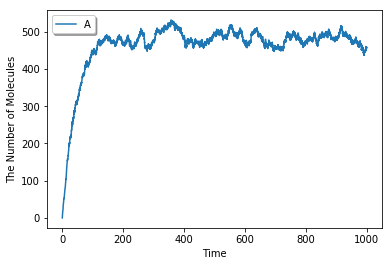

In [6]:
print('rm',rm)
print(dt,'s')
print(dt/60,'min')
viz.plot_number_observer(obs_e)

In [7]:
np.array(obs_e.data()).T[1]

array([  0.,   1.,   2., ..., 457., 458., 458.])